!pip install pycaret==3.0.4  # 書籍執筆時点のバージョンをインストール


# 最新版をインストール場合はこちら
# !pip install pycaret

In [1]:
from pycaret.classification import *
from pycaret.datasets import get_data

In [2]:
df = get_data('hepatitis')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [3]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [4]:
clf1 = setup(data=df, target='Class', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


In [5]:
clf1.X_transformed.sort_index().head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30.0,2.0,1.000000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,59.847458,1.0
1,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,59.847458,1.0
2,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,59.847458,1.0
3,31.0,1.0,1.476635,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1.0
4,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,103.199997,200.0,4.0,59.847458,1.0


# モデルの学習

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8518,0.9090,0.5667,0.7500,0.6100,0.5251,0.5540,0.4980
rf,Random Forest Classifier,0.8509,0.9076,0.5167,0.6000,0.5333,0.4712,0.4872,0.1200
ridge,Ridge Classifier,0.8418,0.9014,0.5667,0.6333,0.5500,0.4695,0.5016,0.0190
lda,Linear Discriminant Analysis,0.8418,0.9014,0.6167,0.6000,0.5771,0.4907,0.5115,0.0230
dt,Decision Tree Classifier,0.8245,0.7208,0.5333,0.6167,0.5200,0.4339,0.4704,0.0180
qda,Quadratic Discriminant Analysis,0.8227,0.6542,0.1833,0.3500,0.2333,0.2046,0.2243,0.0190
et,Extra Trees Classifier,0.8227,0.9135,0.5167,0.5833,0.5167,0.4213,0.4415,0.0940
ada,Ada Boost Classifier,0.8145,0.8431,0.5333,0.4667,0.4700,0.3787,0.3951,0.0680
gbc,Gradient Boosting Classifier,0.8045,0.8618,0.4500,0.4500,0.4400,0.3341,0.3396,0.0680
lightgbm,Light Gradient Boosting Machine,0.7955,0.8181,0.4167,0.5000,0.4467,0.3251,0.3305,0.0370


In [7]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
lgb = create_model('lightgbm')
tuned_lgb = tune_model(lgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8889,0.5000,0.5000,0.5000,0.3889,0.3889
1,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207,0.6708
2,0.8182,0.7778,0.5000,0.5000,0.5000,0.3889,0.3889
3,0.8182,0.8889,0.5000,0.5000,0.5000,0.3889,0.3889
4,0.6364,0.5000,0.0000,0.0000,0.0000,-0.2222,-0.2222
5,0.7273,0.7500,0.3333,0.5000,0.4000,0.2326,0.2406
6,0.7273,0.6250,0.3333,0.5000,0.4000,0.2326,0.2406
7,0.7000,0.8750,0.0000,0.0000,0.0000,-0.1538,-0.1667
8,0.8000,0.8750,0.5000,0.5000,0.5000,0.3750,0.3750


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.7222,0.0000,0.0000,0.0000,-0.1379,-0.1491
1,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207,0.6708
2,0.9091,0.8889,0.5000,1.0000,0.6667,0.6207,0.6708
3,0.8182,0.9444,0.5000,0.5000,0.5000,0.3889,0.3889
4,0.6364,0.5556,0.0000,0.0000,0.0000,-0.2222,-0.2222
5,0.7273,0.7917,0.3333,0.5000,0.4000,0.2326,0.2406
6,0.8182,0.6250,0.3333,1.0000,0.5000,0.4211,0.5164
7,0.7000,0.8750,0.0000,0.0000,0.0000,-0.1538,-0.1667
8,0.8000,0.9375,0.5000,0.5000,0.5000,0.3750,0.3750


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
tuned_lgb

LGBMClassifier(bagging_fraction=0.9, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=170, n_jobs=-1, num_leaves=2, objective=None,
               random_state=1234, reg_alpha=0.01, reg_lambda=3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

# モデルの評価

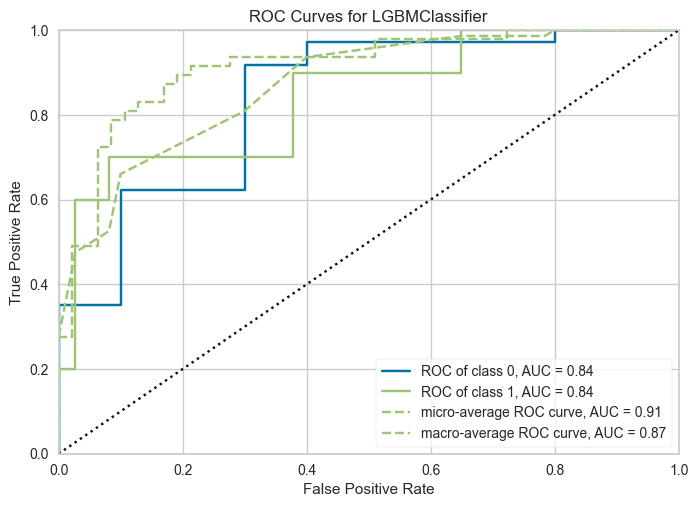

In [10]:
plot_model(tuned_lgb, plot='auc')

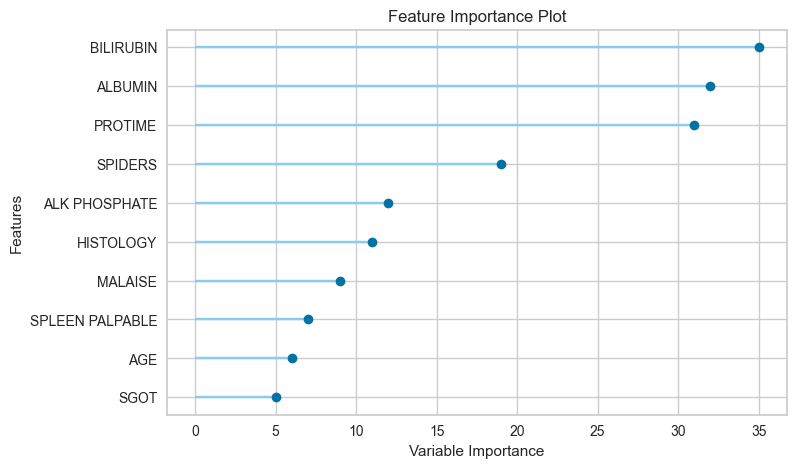

In [11]:
plot_model(tuned_lgb, plot='feature')

# デプロイ

In [12]:
pred = predict_model(tuned_lgb, data=df)
pred['prediction_score']

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8636,0.9110,0.5000,0.7619,0.6038,0.5257,0.5427


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


0      0.9816
1      0.9580
2      0.9745
3      0.9816
4      0.9788
        ...  
149    0.7550
150    0.9533
151    0.8845
152    0.7356
153    0.5712
Name: prediction_score, Length: 154, dtype: float64

In [13]:
save_model(tuned_lgb, 'lgb_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AGE', 'SEX', 'STEROID',
                                              'ANTIVIRALS', 'FATIGUE', 'MALAISE',
                                              'ANOREXIA', 'LIVER BIG',
                                              'LIVER FIRM', 'SPLEEN PALPABLE',
                                              'SPIDERS', 'ASCITES', 'VARICES',
                                              'BILIRUBIN', 'ALK PHOSPHATE',
                                              'SGOT', 'ALBUMIN', 'PROTIME',
                                              'HISTOLOGY'],
                                     transformer=SimpleImputer(add_indicator=...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_